In [321]:
import os
os.chdir(r'C:\Users\metro\MachineLearning\Notebooks\Data')
os.getcwd()

'C:\\Users\\metro\\MachineLearning\\Notebooks\\Data'

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## DATA READING

In [323]:
student = pd.read_csv('turkiye-student-evaluation_generic.csv',na_values='NA')

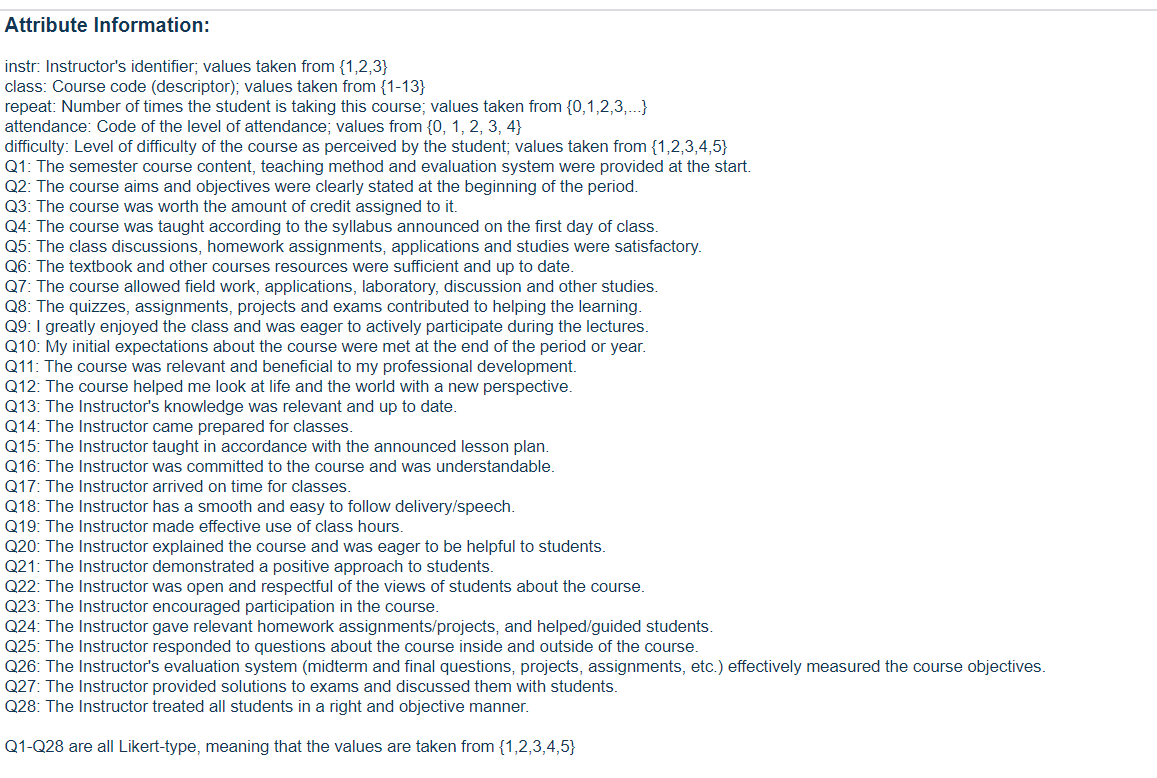

## EDA

In [324]:
student

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## DUPLICATE VALUES

In [325]:
sum(student.duplicated())#No duplicates 

1843

## UNIQUE VALUES

In [326]:
student.apply(lambda x: len(x.unique()))

instr          3
class         13
nb.repeat      3
attendance     5
difficulty     5
Q1             5
Q2             5
Q3             5
Q4             5
Q5             5
Q6             5
Q7             5
Q8             5
Q9             5
Q10            5
Q11            5
Q12            5
Q13            5
Q14            5
Q15            5
Q16            5
Q17            5
Q18            5
Q19            5
Q20            5
Q21            5
Q22            5
Q23            5
Q24            5
Q25            5
Q26            5
Q27            5
Q28            5
dtype: int64

In [327]:
student.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

## NO MISSING VALUES

In [328]:
sum(student.isnull().sum())

0

## TARGET VARIABLE DATA DISTRIBUTION

In [329]:
#checking the value_counts to realise the data is highly imbalanced
student.instr.value_counts()

3    3601
2    1444
1     775
Name: instr, dtype: int64

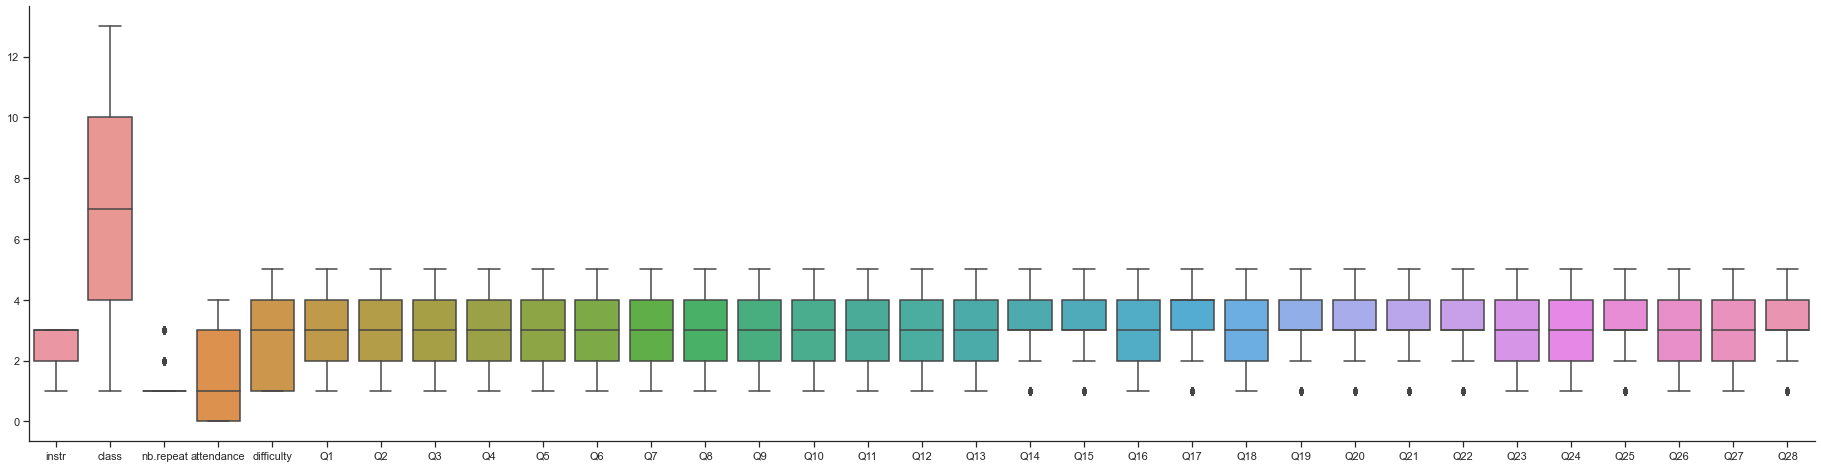

In [330]:
#TO FIND OUTLIERS PLOTTING BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(32,8))
sns.boxplot(data=student) #NO OUTLIERS AS SUCH
sns.despine() 

In [331]:
student.astype('object').describe().transpose()

,count,unique,top,freq
instr,5820,3,3,3601
class,5820,13,3,904
nb.repeat,5820,3,1,4909
attendance,5820,5,0,1902
difficulty,5820,5,3,1774
Q1,5820,5,3,1563
Q2,5820,5,3,1681
Q3,5820,5,3,1746
Q4,5820,5,3,1674
Q5,5820,5,3,1699


## HISTOGRAM OF nb.repeat COLUMN TO CHECK THE DISTRIBUTION

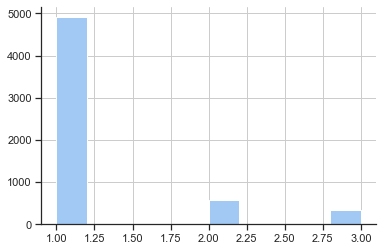

In [332]:
student['nb.repeat'].hist()
sns.despine()

## SPLIT THE TARGET VARIABLE AND INDEPENDENT VARIABLES

In [333]:
#extract dependent and independent variables
X = student.drop(['instr'],axis=1)
y = student.instr

# CROSS VALIDATION FOR ALL MODELS WITH DEFAULT PARAMETERS

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


Logi_score = cross_val_score(LogisticRegression(solver='saga',max_iter=500), X, y, cv = 5).mean()
KNN_score = cross_val_score(KNeighborsClassifier(), X, y, cv = 5).mean()
RandomForest_score=cross_val_score(RandomForestClassifier(),X,y,cv=5).mean()
AdaBoost_score=cross_val_score(AdaBoostClassifier(),X,y,cv=5).mean()
SVC_score=cross_val_score(SVC(),X,y,cv=5).mean()

print('Logistic_score',Logi_score)
print('KNN_score',KNN_score)
print('RandomForest_score',RandomForest_score)
print('AdaBoost_score',AdaBoost_score)
print('SVC_score',SVC_score)

Logistic_score 0.5860824742268042
KNN_score 0.7240549828178694
RandomForest_score 0.7542955326460481
AdaBoost_score 0.6097938144329896
SVC_score 0.5329896907216495


# CROSS VALIDATION FOR ALL MODELS WITH DIFFERENT PARAMETERS

In [335]:
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SVC" : SVC()
}
 
KNNscore1 = []
KNNscore2 = []
RDscore = [] 
ADscore = [] 
SVCscore= []

for name, model in models.items():
     
         if(name=='K-Nearest Neighbors'):
            for i in range(1,11,1):
                knn1 = KNeighborsClassifier(n_neighbors=i, weights='uniform')  
                KNNscore1.append(cross_val_score(knn1,X,y,cv=5).mean())
            
            for i in range(11,30,1):
                    knn2 = KNeighborsClassifier(n_neighbors=i, weights='distance') #uniform and #distance showing 40 percentage 
                    KNNscore2.append(cross_val_score(knn2,X,y,cv=5).mean())    
                  
        if(name=='RandomForestClassifier'):
             for i in range(90,120,10):
                    model = RandomForestClassifier(n_estimators=i,max_depth=40,random_state=42)
                    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
                    RDscore.append(kfold_score)  
        if(name=='AdaBoostClassifier'):
              for i in range(1,101,10):
                ADscore.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=42), X,y,cv=5).mean())
     
      if(name=='SVC'): 
             kernel = ['linear','rbf','poly','sigmoid']
             for k in kernel:
                  SVCscore.append(cross_val_score(SVC(kernel=k),X,y,cv=5).mean())
        
    

# CROSS VALUE SCORES PLOTTED IN GRAPH

## KNNSCORE WITH UNIFORM WEIGHTS

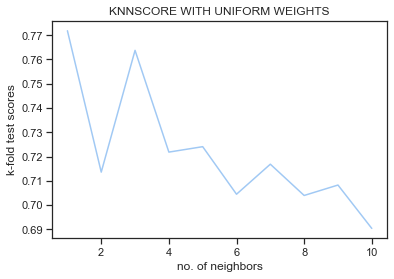

In [336]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),KNNscore1)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.title('KNNSCORE WITH UNIFORM WEIGHTS')
plt.show()

## KNNSCORE WITH DISTANCE WEIGHTS

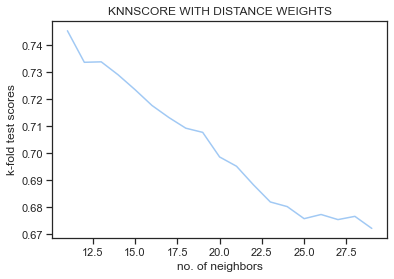

In [337]:
import matplotlib.pyplot as plt
plt.plot(range(11,30,1),KNNscore2)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.title('KNNSCORE WITH DISTANCE WEIGHTS')
plt.show()

## RANDOMFOREST KFOLD SCORE

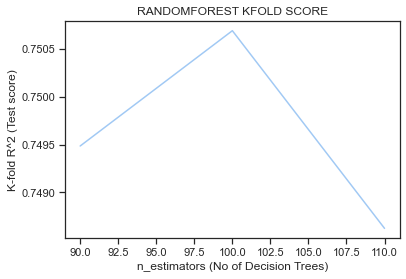

[0.7494845360824741, 0.7506872852233676, 0.7486254295532645]


In [338]:
import matplotlib.pyplot as plt
plt.plot(range(90,120,10),RDscore)
plt.xlabel('n_estimators (No of Decision Trees)')
plt.ylabel('K-fold R^2 (Test score)')
plt.title('RANDOMFOREST KFOLD SCORE')
plt.show()
print(RDscore)

# ADaBoost K FOLD SCORE

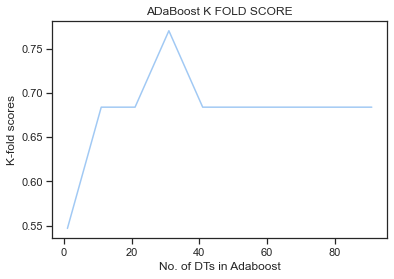

[0.5467353951890035, 0.6838487972508591, 0.6838487972508591, 0.7702749140893471, 0.6838487972508591, 0.6838487972508591, 0.6838487972508591, 0.6838487972508591, 0.6838487972508591, 0.6838487972508591]


In [339]:
plt.plot(range(1,101,10),ADscore )
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.title('ADaBoost K FOLD SCORE')
plt.show()
print(ADscore)

# SVC KFOLD SCORE

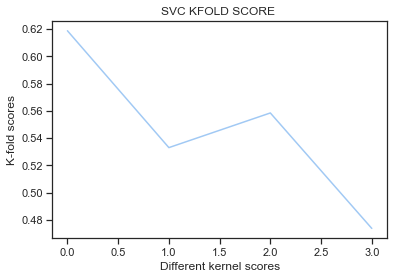

[0.6187285223367698, 0.5329896907216495, 0.5584192439862543, 0.47371134020618555]


In [340]:
plt.plot(range(len(kernel)),SVCscore )
plt.xlabel('Different kernel scores')
plt.ylabel('K-fold scores')
plt.title('SVC KFOLD SCORE ')
plt.show()
print(SVCscore)

## TEST AND TRAIN SPLIT

In [341]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

# APPLYING PCA 

In [342]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [343]:
#lets do pca for feature dimensional reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
X_train_scaled_pca=pca.fit_transform(X_train_scaled)

In [344]:
pca.explained_variance_ratio_

array([0.71898643, 0.04668152, 0.03799468, 0.03410056, 0.02927462])

In [345]:
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
print(X_train_pca.head())
print(X_test_pca.head())

          0         1         2         3         4
0 -0.111567 -2.032639  0.346607  0.194793 -0.692321
1  4.794455  1.037076 -1.060965 -1.266040  0.343117
2  9.066865 -1.264431  0.544642 -1.148061  0.698219
3 -3.437768 -0.198644 -0.320314  0.179531 -0.863707
4  4.808271  0.606229 -0.727230 -1.304098  0.286593
          0         1         2         3         4
0  0.764169 -0.934960 -1.866610  0.045189 -0.964220
1  0.973949  0.290415 -0.054774  0.486610 -0.770336
2  1.050068 -0.255540 -0.501936  1.234664  0.798206
3  9.086351 -1.360117  0.704504  0.648472 -1.303496
4 -0.641371 -0.295556 -0.619435 -0.795328 -0.303441


# APPLIED KMEANS

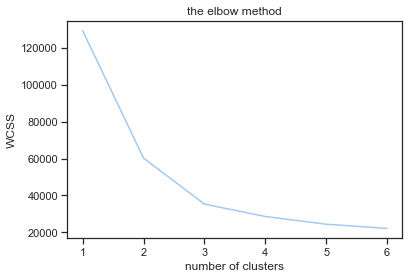

In [346]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_train_scaled_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [347]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(X_train_scaled_pca)

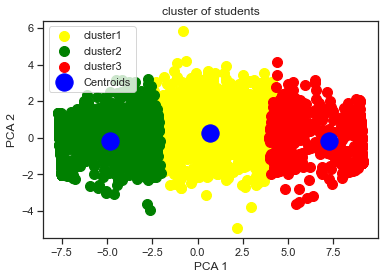

In [348]:
plt.scatter(X_train_scaled_pca[y_kmeans==0,0],X_train_scaled_pca[y_kmeans==0,1],s=100,c='yellow',label='cluster1')
plt.scatter(X_train_scaled_pca[y_kmeans==1,0],X_train_scaled_pca[y_kmeans==1,1],s=100,c='green',label='cluster2')
plt.scatter(X_train_scaled_pca[y_kmeans==2,0],X_train_scaled_pca[y_kmeans==2,1],s=100,c='red',label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label='Centroids')
plt.title('cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [349]:
student.instr.value_counts()

3    3601
2    1444
1     775
Name: instr, dtype: int64

In [510]:
import warnings
warnings.filterwarnings('ignore')

## LOGISTIC REGRESSION

In [511]:
Logim=LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=100,C=0.0001)
Logim.fit(X_train_pca,y_train)

LogisticRegression(C=0.0001, multi_class='multinomial')

In [513]:
Logim.score(X_train_pca,y_train)

0.6200601374570447

In [514]:
print(Logim.score(X_test_pca,y_test))
Logitrain=Logim.score(X_train_pca,y_train)

0.6134020618556701


## Tunning with GridSearchCV ,with Regularization

## LOGISTIC REGRESSION

In [507]:
params = {
            'C': [0.001,0.01,1]
        
        }
Logimodel = GridSearchCV(LogisticRegression(multi_class='multinomial'), params,cv=5)
Logimodel.fit(X_train_pca,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 1]})

In [508]:
print(Logimodel.best_estimator_)
print(Logimodel.best_score_)

LogisticRegression(C=0.001, multi_class='multinomial')
0.6200601134964941


In [509]:
print(Logimodel.score(X_train_pca,y_train))
print(Logimodel.score(X_test_pca,y_test))
Logitrain1=Logimodel.score(X_train_pca,y_train)

0.6200601374570447
0.6134020618556701


## LOGISTIC REGRESSION WITH CLASS WEIGHTS

In [396]:
params = {
            'C': [0.001,1]
        
        }
Logimodel1 = GridSearchCV(LogisticRegression(multi_class='multinomial',class_weight={1:4, 2:2 ,3:1}), params,cv=5)
Logimodel1.fit(X_train_pca,y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={1: 4, 2: 2, 3: 1},
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 1]})

In [397]:
print(Logimodel1.best_estimator_)#default 5 neigbours choosen
print(Logimodel1.best_score_)

LogisticRegression(C=0.001, class_weight={1: 4, 2: 2, 3: 1},
                   multi_class='multinomial')
0.510308266066761


In [398]:
print(Logimodel1.score(X_train_pca,y_train))
print(Logimodel1.score(X_test_pca,y_test))

0.5092353951890034
0.49312714776632305


## KNeighborsClassifier MODEL

In [457]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_neighbors': [4,6],
            'weights': ['uniform','distance']
        }
KNNmodel = GridSearchCV(KNeighborsClassifier(), params,cv=5)
KNNmodel.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 6],
                         'weights': ['uniform', 'distance']})

In [458]:
print(KNNmodel.best_estimator_)#default 5 neigbours choosen
print(KNNmodel.best_score_)

KNeighborsClassifier(n_neighbors=6, weights='distance')
0.7944590937798205


In [476]:
print(KNNmodel.score(X_train_pca,y_train))#trian score
print(KNNmodel.score(X_test_pca,y_test)) #test score,with neighbours more than 6 ,the TEST score starts decreasing
KNNtrain=KNNmodel.score(X_train_pca,y_train)

0.9946305841924399
0.8247422680412371


## RandomForestClassifier MODEL

In [440]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [110,120,130],
            'max_depth': [10,20,30]
        }
RDmodel = GridSearchCV(RandomForestClassifier(random_state=42), params,cv=5)
RDmodel.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [110, 120, 130]})

In [441]:
print(RDmodel.best_params_)
print(RDmodel.best_score_) 

{'max_depth': 30, 'n_estimators': 120}
0.9312721564794881


In [477]:
Randomforest =RDmodel.best_estimator_
#print(Randomforest.fit(X_train_pca,y_train))
print(Randomforest.score(X_train_pca,y_train)) #TRAIN SCORE
print(Randomforest.score(X_test_pca,y_test)) #TEST SCORE
RDtrain=Randomforest.score(X_train_pca,y_train)

0.9946305841924399
0.9355670103092784


## AdaBoostClassifier MODEL

In [414]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [25,30,40],
            'base_estimator': [DecisionTreeClassifier(max_depth=3,random_state=0,class_weight={1:4, 2:2 ,3:1}),
                               DecisionTreeClassifier(max_depth=4,random_state=0),
                               DecisionTreeClassifier(max_depth=5,random_state=0,class_weight={1:4, 2:2 ,3:1})] #balancing no impact
        }
ADmodel = GridSearchCV(AdaBoostClassifier(random_state=42), params,cv=4)
ADmodel.fit(X_train_pca,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={1: 4,
                                                                                 2: 2,
                                                                                 3: 1},
                                                                   max_depth=3,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=4,
                                                                   random_state=0),
                                            DecisionTreeClassifier(class_weight={1: 4,
                                                                                 2: 2,
                                                                                 3: 1},
                                                                   max_depth=5,
  

In [460]:
print(ADmodel.best_params_) # Having 20 n_estimators the TRAIN score started to increase ,but TEST SCORE was decreasing causing OVERFIT
print(ADmodel.best_score_) #TRAIN SCORE 

{'base_estimator': DecisionTreeClassifier(class_weight={1: 4, 2: 2, 3: 1}, max_depth=5,
                       random_state=0), 'n_estimators': 40}
0.8941151202749141


In [478]:
AdaBoost =ADmodel.best_estimator_
#print(AdaBoost.fit(X_train_pca,y_train))
print(AdaBoost.score(X_train_pca,y_train)) #TRAIN SCORE
print(AdaBoost.score(X_test_pca,y_test)) #TEST SCORE
ADtrain=AdaBoost.score(X_train_pca,y_train)

0.8949742268041238
0.834192439862543


## SVC MODEL

In [471]:
parameters = {'kernel':('linear','rbf'),
               'C': [0.01,0.1,1]
               
             }


svc2 = SVC()
svclassifier2= GridSearchCV(svc2,param_grid=parameters,cv=5)#default cv=5

In [472]:
svclassifier2.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ('linear', 'rbf')})

In [473]:
print(svclassifier2.best_params_)
print(svclassifier2.best_score_)

{'C': 0.01, 'kernel': 'linear'}
0.6200601134964941


In [479]:
svmc =svclassifier2.best_estimator_
svmc.fit(X_train_pca,y_train)
print(svmc.score(X_train_pca,y_train))
print(svmc.score(X_test_pca,y_test))
svmctrain=svmc.score(X_train_pca,y_train)

0.6200601374570447
0.6134020618556701


## SVC WITH RBF

In [467]:
parameters = {'kernel':('rbf','poly'),'degree':(2,4),
               'C': [0.01,0.1,1]
               
             }


svc2 = SVC()
svclassifier2= GridSearchCV(svc2,param_grid=parameters,cv=5)#default cv=5

In [468]:
svclassifier2.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': (2, 4),
                         'kernel': ('rbf', 'poly')})

In [469]:
print(svclassifier2.best_params_)
print(svclassifier2.best_score_)

{'C': 0.01, 'degree': 2, 'kernel': 'rbf'}
0.6200601134964941


In [470]:
svmc =svclassifier2.best_estimator_
svmc.fit(X_train_pca,y_train)
print(svmc.score(X_train_pca,y_train))
print(svmc.score(X_test_pca,y_test))

0.6200601374570447
0.6134020618556701


# ACCURACY SCORE;CLASSIFICATION REPORTS

In [523]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix ,ConfusionMatrixDisplay

print("-----------------------------------------------------------------------------------------")
#LOGISTICREGRESSION
y_Lpred = Logim.predict(X_test_pca)
print('LOGISTIC REGRESSION BEST ACCURACY SCORE :',Logim.score(X_test_pca,y_test))
print('LOGISTIC REGRESSION TRAIN ACCURACY SCORE :',Logitrain)
print('LOGISTIC REGRESSION TEST ACCURACY SCORE :',accuracy_score(y_test,y_Lpred))
print("-----------------------------------------------------------------------------------------")
print(classification_report(y_test,y_Lpred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_Lpred))


print("-----------------------------------------------------------------------------------------")
#ADaBOOST
y_KNNpred = KNNmodel.predict(X_test_pca)
print('KNeighbors Classifier BEST ACCURACY :',KNNmodel.best_score_ ,'WITH BEST PARAM',KNNmodel.best_estimator_)
print('KNeighbors Classifier TRAIN ACCURACY SCORE :',KNNtrain)
print('KNeighbors Classifier TEST ACCURACY :',accuracy_score(y_test,y_KNNpred))
print("-----------------------------------------------------------------------------------------")
print(classification_report(y_test,y_KNNpred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_KNNpred))

-----------------------------------------------------------------------------------------
LOGISTIC REGRESSION BEST ACCURACY SCORE : 0.6134020618556701
LOGISTIC REGRESSION TRAIN ACCURACY SCORE : 0.6200601374570447
LOGISTIC REGRESSION TEST ACCURACY SCORE : 0.6134020618556701
-----------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       171
           2       0.00      0.00      0.00       279
           3       0.61      1.00      0.76       714

    accuracy                           0.61      1164
   macro avg       0.20      0.33      0.25      1164
weighted avg       0.38      0.61      0.47      1164

CONFUSION MATRIX
[[  0   0 171]
 [  0   0 279]
 [  0   0 714]]
-----------------------------------------------------------------------------------------
KNeighbors Classifier BEST ACCURACY : 0.7944590937798205 WITH BEST PARAM KNeighborsClassifier(n_neighb

In [520]:
print("-----------------------------------------------------------------------------------------")
#RANDOMFOREST
y_RDpred = RDmodel.predict(X_test_pca)
print('RANDOMFOREST BEST ACCURACY :',RDmodel.best_score_ ,'WITH BEST PARAM',RDmodel.best_estimator_)
print('RANDOMFOREST TRAIN ACCURACY SCORE :',RDtrain)
print('RANDOMFOREST TEST ACCURACY :',accuracy_score(y_test,y_RDpred))
print("-----------------------------------------------------------------------------------------")
print(classification_report(y_test,y_RDpred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_RDpred))


print("-----------------------------------------------------------------------------------------")
#ADaBOOST
y_ADpred = ADmodel.predict(X_test_pca)
print('AdaBoost BEST ACCURACY :',ADmodel.best_score_ ,'WITH BEST PARAM',ADmodel.best_estimator_)
print('AdaBoost TRAIN ACCURACY SCORE :',ADtrain)
print('AdaBoost TEST ACCURACY :',accuracy_score(y_test,y_ADpred))
print("-----------------------------------------------------------------------------------------")
print(classification_report(y_test,y_ADpred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_ADpred))

-----------------------------------------------------------------------------------------
RANDOMFOREST BEST ACCURACY : 0.9312721564794881 WITH BEST PARAM RandomForestClassifier(max_depth=30, n_estimators=120, random_state=42)
RANDOMFOREST TRAIN ACCURACY SCORE : 0.9946305841924399
RANDOMFOREST TEST ACCURACY : 0.9355670103092784
-----------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.98      0.83      0.90       171
           2       0.93      0.88      0.90       279
           3       0.93      0.98      0.96       714

    accuracy                           0.94      1164
   macro avg       0.95      0.90      0.92      1164
weighted avg       0.94      0.94      0.93      1164

CONFUSION MATRIX
[[142   7  22]
 [  2 246  31]
 [  1  12 701]]
-----------------------------------------------------------------------------------------
AdaBoost BEST ACCURACY : 0.8941151202749141 WIT

In [518]:
print("-----------------------------------------------------------------------------------------")
#SUPPORT VECTOR CLASSIFIER
y_svmcpred = svmc.predict(X_test_pca)
print('Support VECTOR CLASSIFIER BEST ACCURACY :',svclassifier2.best_score_ ,'WITH BEST PARAM',svclassifier2.best_estimator_)
print('Support VECTOR CLASSIFIER TRAIN ACCURACY SCORE :',svmctrain)
print('Support VECTOR CLASSIFIER TEST ACCURACY :',accuracy_score(y_test,y_svmcpred))
print("-----------------------------------------------------------------------------------------")
print(classification_report(y_test,y_svmcpred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_svmcpred))


-----------------------------------------------------------------------------------------
Support VECTOR CLASSIFIER BEST ACCURACY : 0.6200601134964941 WITH BEST PARAM SVC(C=0.01, kernel='linear')
Support VECTOR CLASSIFIER TRAIN ACCURACY SCORE : 0.6200601374570447
Support VECTOR CLASSIFIER TEST ACCURACY : 0.6134020618556701
-----------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       171
           2       0.00      0.00      0.00       279
           3       0.61      1.00      0.76       714

    accuracy                           0.61      1164
   macro avg       0.20      0.33      0.25      1164
weighted avg       0.38      0.61      0.47      1164

CONFUSION MATRIX
[[  0   0 171]
 [  0   0 279]
 [  0   0 714]]


# MODEL SCORE SUMMARY

In [495]:
listmodel=['Logistic Regression','KNN','RandomForest','ADABOOST','SVR']
LIST_CV=[Logi_score*100,KNN_score*100,RandomForest_score*100,AdaBoost_score*100,SVC_score*100]
MODELS = pd.DataFrame(listmodel, columns=["MODEL"])
CVSCORES= pd.DataFrame(LIST_CV, columns=["CROSS VALIDATION SCORE"])

LIST_TRAINSCORE=[Logitrain,KNNtrain,RDtrain,ADtrain,svmctrain]
TRAINSCORES= pd.DataFrame(LIST_TRAINSCORE, columns=["TRAIN SCORE"])

LIST_ACCUSCORE=[accuracy_score(y_test,y_Lpred)*100,accuracy_score(y_test,y_KNNpred)*100,accuracy_score(y_test,y_RDpred)*100,accuracy_score(y_test,y_ADpred)*100,accuracy_score(y_test,y_svmcpred)*100]
ACCUSCORES= pd.DataFrame(LIST_ACCUSCORE, columns=["ACCURACY SCORE"])

model_strength=pd.concat([MODELS,CVSCORES,TRAINSCORES,ACCUSCORES],axis=1)
#print(model_strength.sort_values(by=['TEST SCORE'],ascending=False))
model_strength


,MODEL,CROSS VALIDATION SCORE,TRAIN SCORE,ACCURACY SCORE
0,Logistic Regression,58.608247,0.620060,61.340206
1,KNN,72.405498,0.994631,80.927835
2,RandomForest,75.429553,0.994631,93.470790
3,ADABOOST,60.979381,0.894974,83.419244
4,SVR,53.298969,0.620060,61.340206


In [496]:
print(model_strength.sort_values(by=['ACCURACY SCORE'],ascending=False))

                 MODEL  CROSS VALIDATION SCORE  TRAIN SCORE  ACCURACY SCORE
2         RandomForest               75.429553     0.994631       93.470790
3             ADABOOST               60.979381     0.894974       83.419244
1                  KNN               72.405498     0.994631       80.927835
0  Logistic Regression               58.608247     0.620060       61.340206
4                  SVR               53.298969     0.620060       61.340206


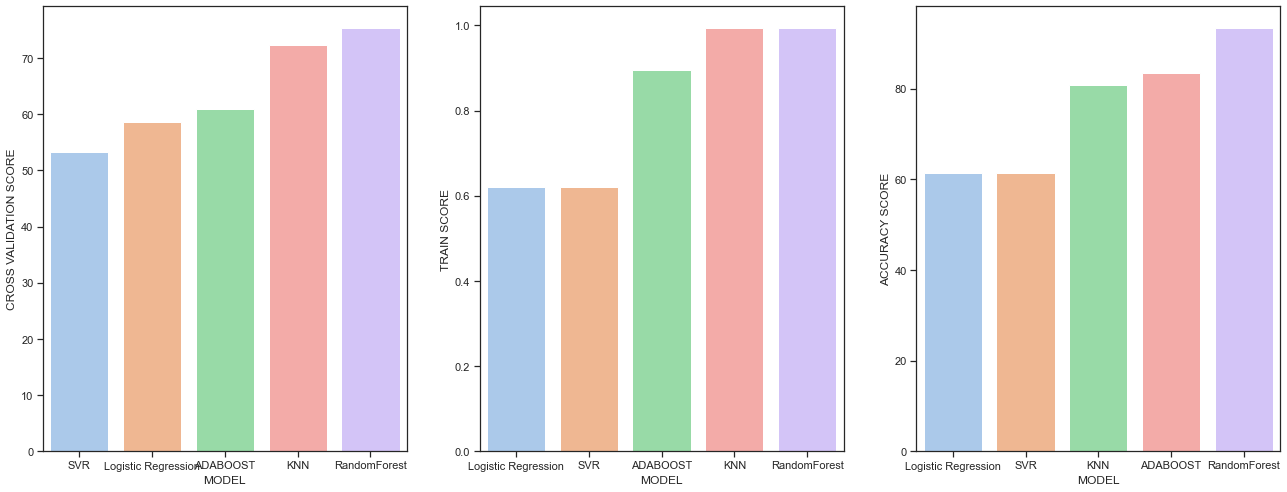

In [499]:
plt.figure(figsize=(30, 18))
plt.subplot(2,4,1)
sns.barplot(x ='MODEL' , y = 'CROSS VALIDATION SCORE', data = model_strength,order=model_strength.sort_values('CROSS VALIDATION SCORE').MODEL)
plt.subplot(2,4,2)
sns.barplot(x='MODEL',y='TRAIN SCORE', data = model_strength,order=model_strength.sort_values('TRAIN SCORE').MODEL)
plt.subplot(2,4,3)
sns.barplot(x='MODEL',y='ACCURACY SCORE', data = model_strength,order=model_strength.sort_values('ACCURACY SCORE').MODEL)

plt.show()

KNeighbors Classifier


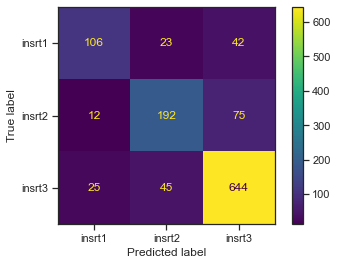

In [485]:
print('KNeighbors Classifier')
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_KNNpred), display_labels=['insrt1','insrt2','insrt3']).plot())

RANDOM FOREST MODEL


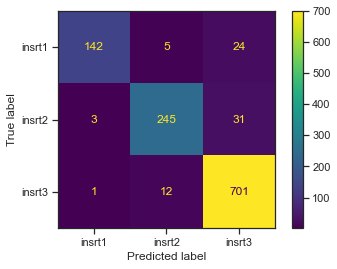

In [486]:
print('RANDOM FOREST MODEL')
print(ConfusionMatrixDisplay(confusion_matrix(y_test,y_RDpred), display_labels=['insrt1','insrt2','insrt3']).plot())

In [93]:
student.instr.value_counts()

3    3601
2    1444
1     775
Name: instr, dtype: int64

# SAVING DATASET FOR SPARK

In [165]:
student_copy = student[:]

In [166]:
student_copy

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [168]:
student_copy.to_csv(r'C:\Users\metro\MachineLearning\Notebooks\Data\student_copy.csv', index = False)